<a href="https://colab.research.google.com/github/Reben80/DATA205-PROJECT/blob/main/AssefaData205Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#df=pd.read_csv('/content/Daily_Arrests_20241001 (1).csv')
df=pd.read_csv('https://raw.githubusercontent.com/adinsa1/DATA205-PROJECT/refs/heads/main/Daily_Arrests_20241001%20(1).csv')


In [3]:
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    473 non-null    object
 1   FIRST NAME   473 non-null    object
 2   MIDDLE NAME  376 non-null    object
 3   AGE          473 non-null    int64 
 4   STREET       473 non-null    object
 5   CITY         473 non-null    object
 6   STATE        473 non-null    object
 7   ARREST DATE  473 non-null    object
 8   OFFENSE      473 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.4+ KB


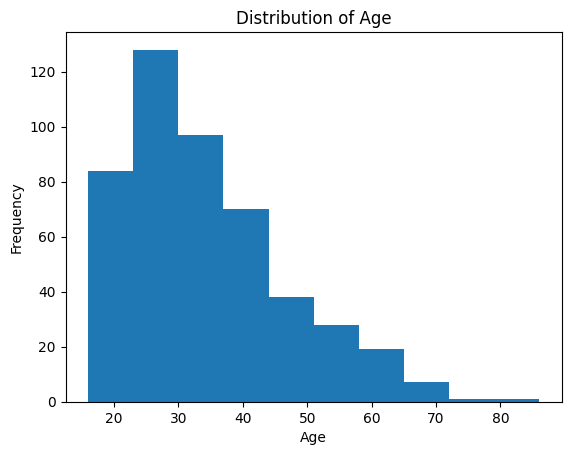

In [5]:
plt.hist(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

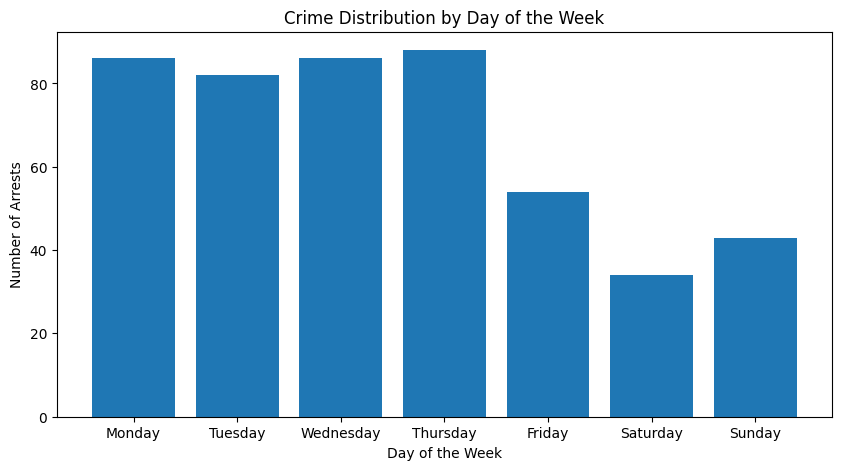

In [6]:

# Convert 'ARREST_DATE' to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['ARREST DATE']):
  df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['ARREST DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = df.groupby('DayOfWeek')['ARREST DATE'].count()



# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution by Day of the Week")
plt.show()



We are interested in these types of arrest:-
1. `(DRIVING/ATTEMPTING TO) DRIVE MOTOR VEH. ON HWY W/O REQ. LICENSE AND AUTHORIZATION`
2. `PERSON DRIVING MOTOR VEH. ON (HWY., PUBLIC USE PROPERTY) ON SUSPENDED LIC. AND PRIVILEGE`
3. `(DRIVING, ATTEMPTING TO DRIVE) VEHICLE WHILE UNDERTHE INFLUENCE OF ALCOHOL`
4.`DRIVING UNINSURED VEHICLE`
5.



In [10]:
filtered_df = df[df['OFFENSE'].str.contains('driving', case=False, na=False)]
plt.hbar(filtered_df ['OFFENSE'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'hbar'

In [11]:
filtered_df = df[df['OFFENSE'].str.contains('driving', case=False, na=False)]
plt.barh(filtered_df ['OFFENSE']) # Changed plt.hbar to plt.barh

TypeError: barh() missing 1 required positional argument: 'width'

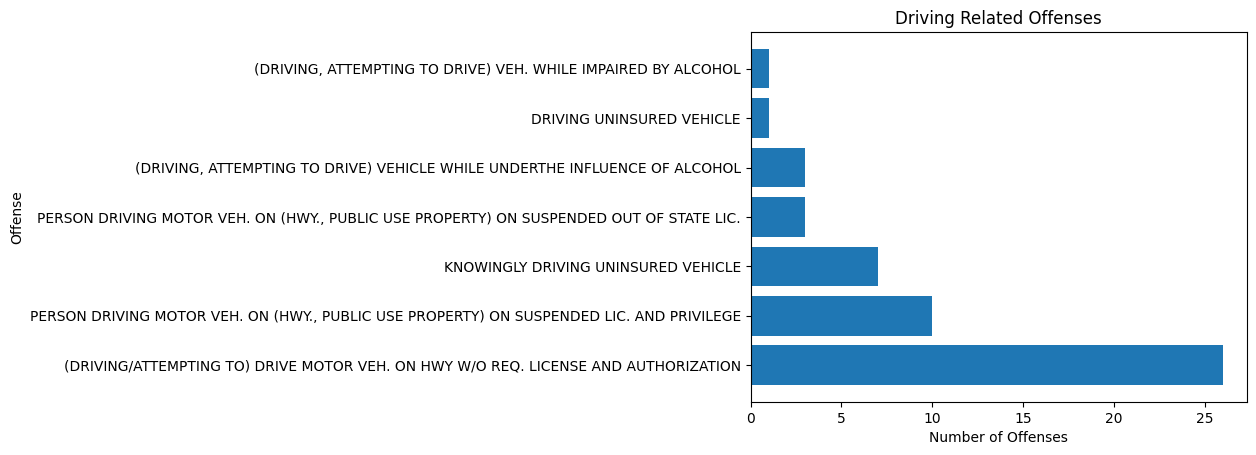

In [12]:
filtered_df = df[df['OFFENSE'].str.contains('driving', case=False, na=False)]

# Calculate the count of each offense
offense_counts = filtered_df['OFFENSE'].value_counts()

# Plot the horizontal bar chart
plt.barh(offense_counts.index, offense_counts.values)

# Add labels and title
plt.xlabel('Number of Offenses')
plt.ylabel('Offense')
plt.title('Driving Related Offenses')

plt.show()